In [1]:
#https://towardsdatascience.com/pca-on-hyperspectral-data-99c9c5178385
#https://towardsdatascience.com/classification-on-hyperspectral-data-19c48c432b96

In [16]:
import matplotlib.pyplot as plt
import numpy as np,os,sys
from scipy.io import loadmat
### IMPORT PACKAGES ###
import scipy
import numpy as np,os
import pandas as pd
from sklearn.svm import SVC
from scipy.io import loadmat
import matplotlib.pyplot as plt
import sklearn.decomposition as dcp
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold, train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
##  Read Data
mat = loadmat('./data/pca_example/muufl_gulfport_campus_1_hsi_220_label.mat')

keys = mat.keys()
hsi = mat['hsi']
hsi = hsi[0]
hsi = hsi[0]
HyperData = hsi[1]

In [5]:
print(HyperData.shape)

(325, 220, 64)


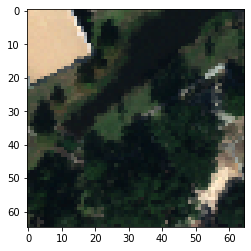

In [6]:
rgb=hsi[9]
rgb=rgb[:65,:65,:]
plt.imshow(rgb)
plt.show()

In [8]:
X = HyperData.reshape(HyperData.shape[0]*HyperData.shape[1], -1)
print(X.shape)

(71500, 64)


PCA is based on the mathematical principle known as Eigen value decomposition of the covariance matrix of the Hyperspectral bands to be analyzed.

In [9]:
covariance_matrix=np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

#### Sort the eigen values in descending order and get the corresponding eigen vectors
After sorting them in decreasing order, the eigen value and eigen vector with the most information will be at the top of the list.

In [10]:
ind=np.arange(0,len(eigen_values),1)
ind=[x for _,x in sorted(zip(eigen_values,ind))]
ind=ind[::-1]
eigen_values1=eigen_values[ind]
eigen_vectors1=eigen_vectors[:,ind]

In [11]:
#Extract the top 3 eigen vectors
eigen_vectors1=eigen_vectors1[:,:3]

Text(0.5, 0.92, 'simple 3D scatter plot')

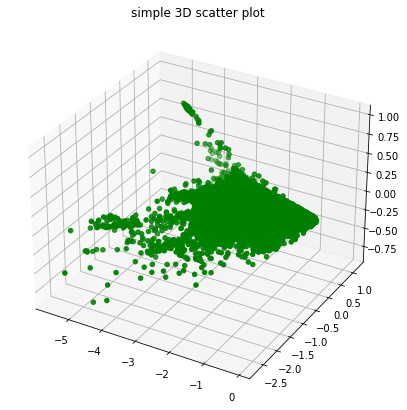

In [12]:
y=(eigen_vectors1.T).dot(X.T) 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(y[0,:], y[1,:], y[2,:], color = "green")
plt.title("simple 3D scatter plot")

In [13]:
projection_matrix = (eigen_vectors.T[:][:3]).T
print(projection_matrix)

[[-3.06612167e-02 -1.21489920e-01 -1.81419434e-01]
 [-3.35194564e-02 -1.27803220e-01 -1.97795132e-01]
 [-3.59923598e-02 -1.32033502e-01 -2.03047834e-01]
 [-3.77193828e-02 -1.33006662e-01 -1.98699633e-01]
 [-3.95661878e-02 -1.35871423e-01 -1.95215986e-01]
 [-4.10184822e-02 -1.37906834e-01 -1.88933167e-01]
 [-4.24182843e-02 -1.40264160e-01 -1.85046668e-01]
 [-4.33954315e-02 -1.41137695e-01 -1.80585431e-01]
 [-4.47371451e-02 -1.43469890e-01 -1.77441747e-01]
 [-4.74832283e-02 -1.49433478e-01 -1.77659743e-01]
 [-4.87955994e-02 -1.49294006e-01 -1.69703734e-01]
 [-5.17807598e-02 -1.51312532e-01 -1.63636499e-01]
 [-5.55749924e-02 -1.50676738e-01 -1.55288542e-01]
 [-6.01822909e-02 -1.50770725e-01 -1.47999347e-01]
 [-6.30643313e-02 -1.50098650e-01 -1.35087201e-01]
 [-6.58469945e-02 -1.52047130e-01 -1.20473918e-01]
 [-6.71094699e-02 -1.54704722e-01 -9.85783849e-02]
 [-6.75786919e-02 -1.60423537e-01 -7.10455703e-02]
 [-6.83245638e-02 -1.68457267e-01 -4.13373868e-02]
 [-6.92935954e-02 -1.74067631e-

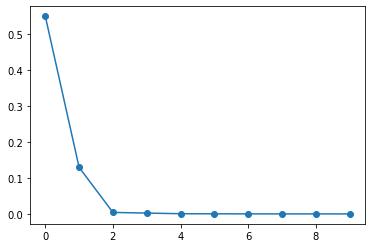

In [15]:
#In this image, we can see that the top eigen value contains the most information.

eigen_values1=eigen_values1[:10]
x=np.arange(0,len(eigen_values1),1)
plt.plot(x,eigen_values1,marker = 'o')
plt.show()

PCA is a very useful technique for Hyperspectral classification. We can see from the plot above that the top 3 eigen values contain the most information. After that, rest are mostly noise. PCA cuts down down the calculation time of classification by a significant amount and also reduces the amount of data to be handled. The PCA preprocessing gives rather acceptable and accurate classification results.
Apart from PCA, there are also other alternative preprocessing approaches like Canonical Component Analysis. It maps data from different views onto a common space with maximum correlation.

In [50]:
mat_data = loadmat('./data/pca_example/muufl_gulfport_campus_1_hsi_220_label.mat')

hsi = mat_data['hsi'][0,0]['Data']
truth = mat_data['hsi'][0,0]['groundTruth']
sceneLabels = mat_data['hsi'][0,0]['sceneLabels']
#name = mat_data['hsi'][0,0]['NamesOfClasses']
labels = mat_data['hsi'][0,0]['sceneLabels'][0,0]['labels']
# X and Y contains all the images and labels 
X= hsi.reshape(hsi.shape[0]*hsi.shape[1], -1) 
Y = labels.reshape(labels.shape[0]*labels.shape[1], -1)

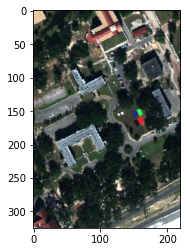

In [51]:
rgb= mat_data['hsi'][0,0]['RGB']
plt.imshow(rgb)

[[8]
 [8]
 [8]
 ...
 [4]
 [4]
 [4]]


In [55]:
# Set the unwanted classes to -1

for i in range(len(Y)): 
    if (Y[i]==2):
        Y[i]=-1
    if (Y[i]==3):
        Y[i]=2
    if (Y[i]==4):
        Y[i]=3
    if (Y[i]==5):
        Y[i]=4
    if (Y[i]==7 or Y[i]==6):
        Y[i]=5
    if (Y[i]==8):
        Y[i]=6
    if (Y[i]==9):
        Y[i]=7
    if (Y[i]==10):
        Y[i]=-1
    if (Y[i]==11):
        Y[i]=-1
        
unwanted,_=np.where(Y == -1)
wanted,_= np.where(Y != -1)
#X_new and Y_new does not have the unwanted label
X_new=X[wanted]
Y_new=Y[wanted]
Y_new = Y_new - 1

In [56]:
XTrain, XTest, yTrain, yTest = train_test_split(X_new, Y_new, test_size=0.30,shuffle=True,random_state=10)

In [57]:
kfold = KFold(3, True, 1)
accuracySVM=[]

# convert the numpy array to pandas dataframe

df_X = pd.DataFrame(XTrain)
df_Y = pd.DataFrame(yTrain)

# split the training data for cross-validation 

for train_index , test_index in kfold.split( df_X, df_Y):
    X_train , X_test = df_X.iloc[train_index,:],df_X.iloc[test_index,:]
    y_train , y_test = df_Y.iloc[train_index] , df_Y.iloc[test_index]
    svclassifier = SVC(kernel='rbf')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracySVM.append(acc)
accuracynp = np.asarray(accuracySVM)

print("Mean Cross-validation Accuracy of the Original Data :",np.mean(accuracynp))
print("Standard Deviation of the Original Data :",np.std(accuracynp))

# predict on the test data 

yPredTest =svclassifier.predict(XTest)
accTest = accuracy_score(yTest, yPredTest)
print("Accuracy on the test data is ",accTest)

Mean Cross-validation Accuracy of the Original Data : 0.9091522055431348
Standard Deviation of the Original Data : 0.003825076356625621
Accuracy on the test data is  0.916956449743335


In [58]:
# Ensemble of 3 models

svcmodel1 = SVC(kernel='rbf')
svcmodel2 = SVC(kernel='rbf')
svcmodel3 = SVC(kernel='rbf')

In [59]:
# create a PCA object

PCAObj = dcp.PCA(0.99)

# Apply PCA on traing and testing data to reduce the dimensions 

XTrain = PCAObj.fit(XTrain).transform(XTrain)
XTest = PCAObj.fit(XTest).transform(XTest)

# Apply StandardScaler to the MUUFL GULF port dataset directly to standardize the input variables.

stdscaler = StandardScaler()

XTrain = stdscaler.fit_transform(XTrain)
XTest = stdscaler.fit_transform(XTest)

# Convert the numpy array to pandaas dataframe

df_X = pd.DataFrame(XTrain)
df_Y = pd.DataFrame(yTrain)

# Training and croos validation for model 1

kfold = KFold(3, True, 1)
accuracySVM1=[]

for train_index , test_index in kfold.split( df_X, df_Y):
    X_train , X_test = df_X.iloc[train_index,:],df_X.iloc[test_index,:]
    y_train , y_test = df_Y.iloc[train_index] , df_Y.iloc[test_index]
    svcmodel1.fit(X_train, y_train)
    y_pred = svcmodel1.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracySVM1.append(acc)
accuracynp1 = np.asarray(accuracySVM1)
print("Mean Cross Validation Accuracy after PCA Model1 :",np.mean(accuracynp1))
print("Standard Deviation after PCA Model1:",np.std(accuracynp1))

# Training and croos validation for model 2

kfold = KFold(3, True, 1)
accuracySVM2=[]

for train_index , test_index in kfold.split( df_X, df_Y):
    X_train , X_test = df_X.iloc[train_index,:],df_X.iloc[test_index,:]
    y_train , y_test = df_Y.iloc[train_index] , df_Y.iloc[test_index]
    svcmodel2.fit(X_train, y_train)
    y_pred = svcmodel2.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracySVM2.append(acc)
accuracynp2 = np.asarray(accuracySVM2)
print("Mean Accuracy Cross Validation after PCA Model2:",np.mean(accuracynp2))
print("Standard Deviation after PCA Model2:",np.std(accuracynp2))

# Training and croos validation for model 3

kfold = KFold(3, True, 1)
accuracySVM3=[]

for train_index , test_index in kfold.split( df_X, df_Y):
    X_train , X_test = df_X.iloc[train_index,:],df_X.iloc[test_index,:]
    y_train , y_test = df_Y.iloc[train_index] , df_Y.iloc[test_index]
    svcmodel3.fit(X_train, y_train)
    y_pred = svcmodel3.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracySVM3.append(acc)
accuracynp3 = np.asarray(accuracySVM3)
print("Mean Cross Validation Accuracy after PCA Model3:",np.mean(accuracynp3))
print("Standard Deviation after PCA Model3:",np.std(accuracynp3))

# Predict the accuracies of all 3 ensemble models on the test data

yPredTest1 =svcmodel1.predict(XTest)
accTest1 = accuracy_score(yTest, yPredTest1)
print("Accuracy on the test data from Model 1: ",accTest1)

yPredTest2 =svcmodel2.predict(XTest)
accTest2 = accuracy_score(yTest, yPredTest2)
print("Accuracy on the test data from Model 2: ",accTest2)

yPredTest3 =svcmodel3.predict(XTest)
accTest3 = accuracy_score(yTest, yPredTest3)
print("Accuracy on the test data from Model 3: ",accTest3)

Mean Cross Validation Accuracy after PCA Model1 : 0.9189467333830157
Standard Deviation after PCA Model1: 0.0031489961391786615
Mean Accuracy Cross Validation after PCA Model2: 0.9189467333830157
Standard Deviation after PCA Model2: 0.0031489961391786615
Mean Cross Validation Accuracy after PCA Model3: 0.9189467333830157
Standard Deviation after PCA Model3: 0.0031489961391786615
Accuracy on the test data from Model 1:  0.9240768339128995
Accuracy on the test data from Model 2:  0.9240768339128995
Accuracy on the test data from Model 3:  0.9240768339128995


In [60]:

# convert all the predictions into numpy array

yPredTest1 = yPredTest1.reshape((len(yPredTest1), 1))
yPredTest2 = yPredTest2.reshape((len(yPredTest2), 1))
yPredTest3 = yPredTest3.reshape((len(yPredTest3), 1))

# conactenate all the prediction arrays to into one.

predictions = np.concatenate((yPredTest1, yPredTest2, yPredTest3), axis= 1)

# Compute the majority vote

vote, _ = scipy.stats.mode(predictions, axis=1)
final_accuracy = accuracy_score(yTest, vote)
print("Accuracy on the test data from ensemble Model: ",final_accuracy)

Accuracy on the test data from ensemble Model:  0.9240768339128995


[-1  0  1  2  3]


Text(0.5, 1.0, 'SVM ')

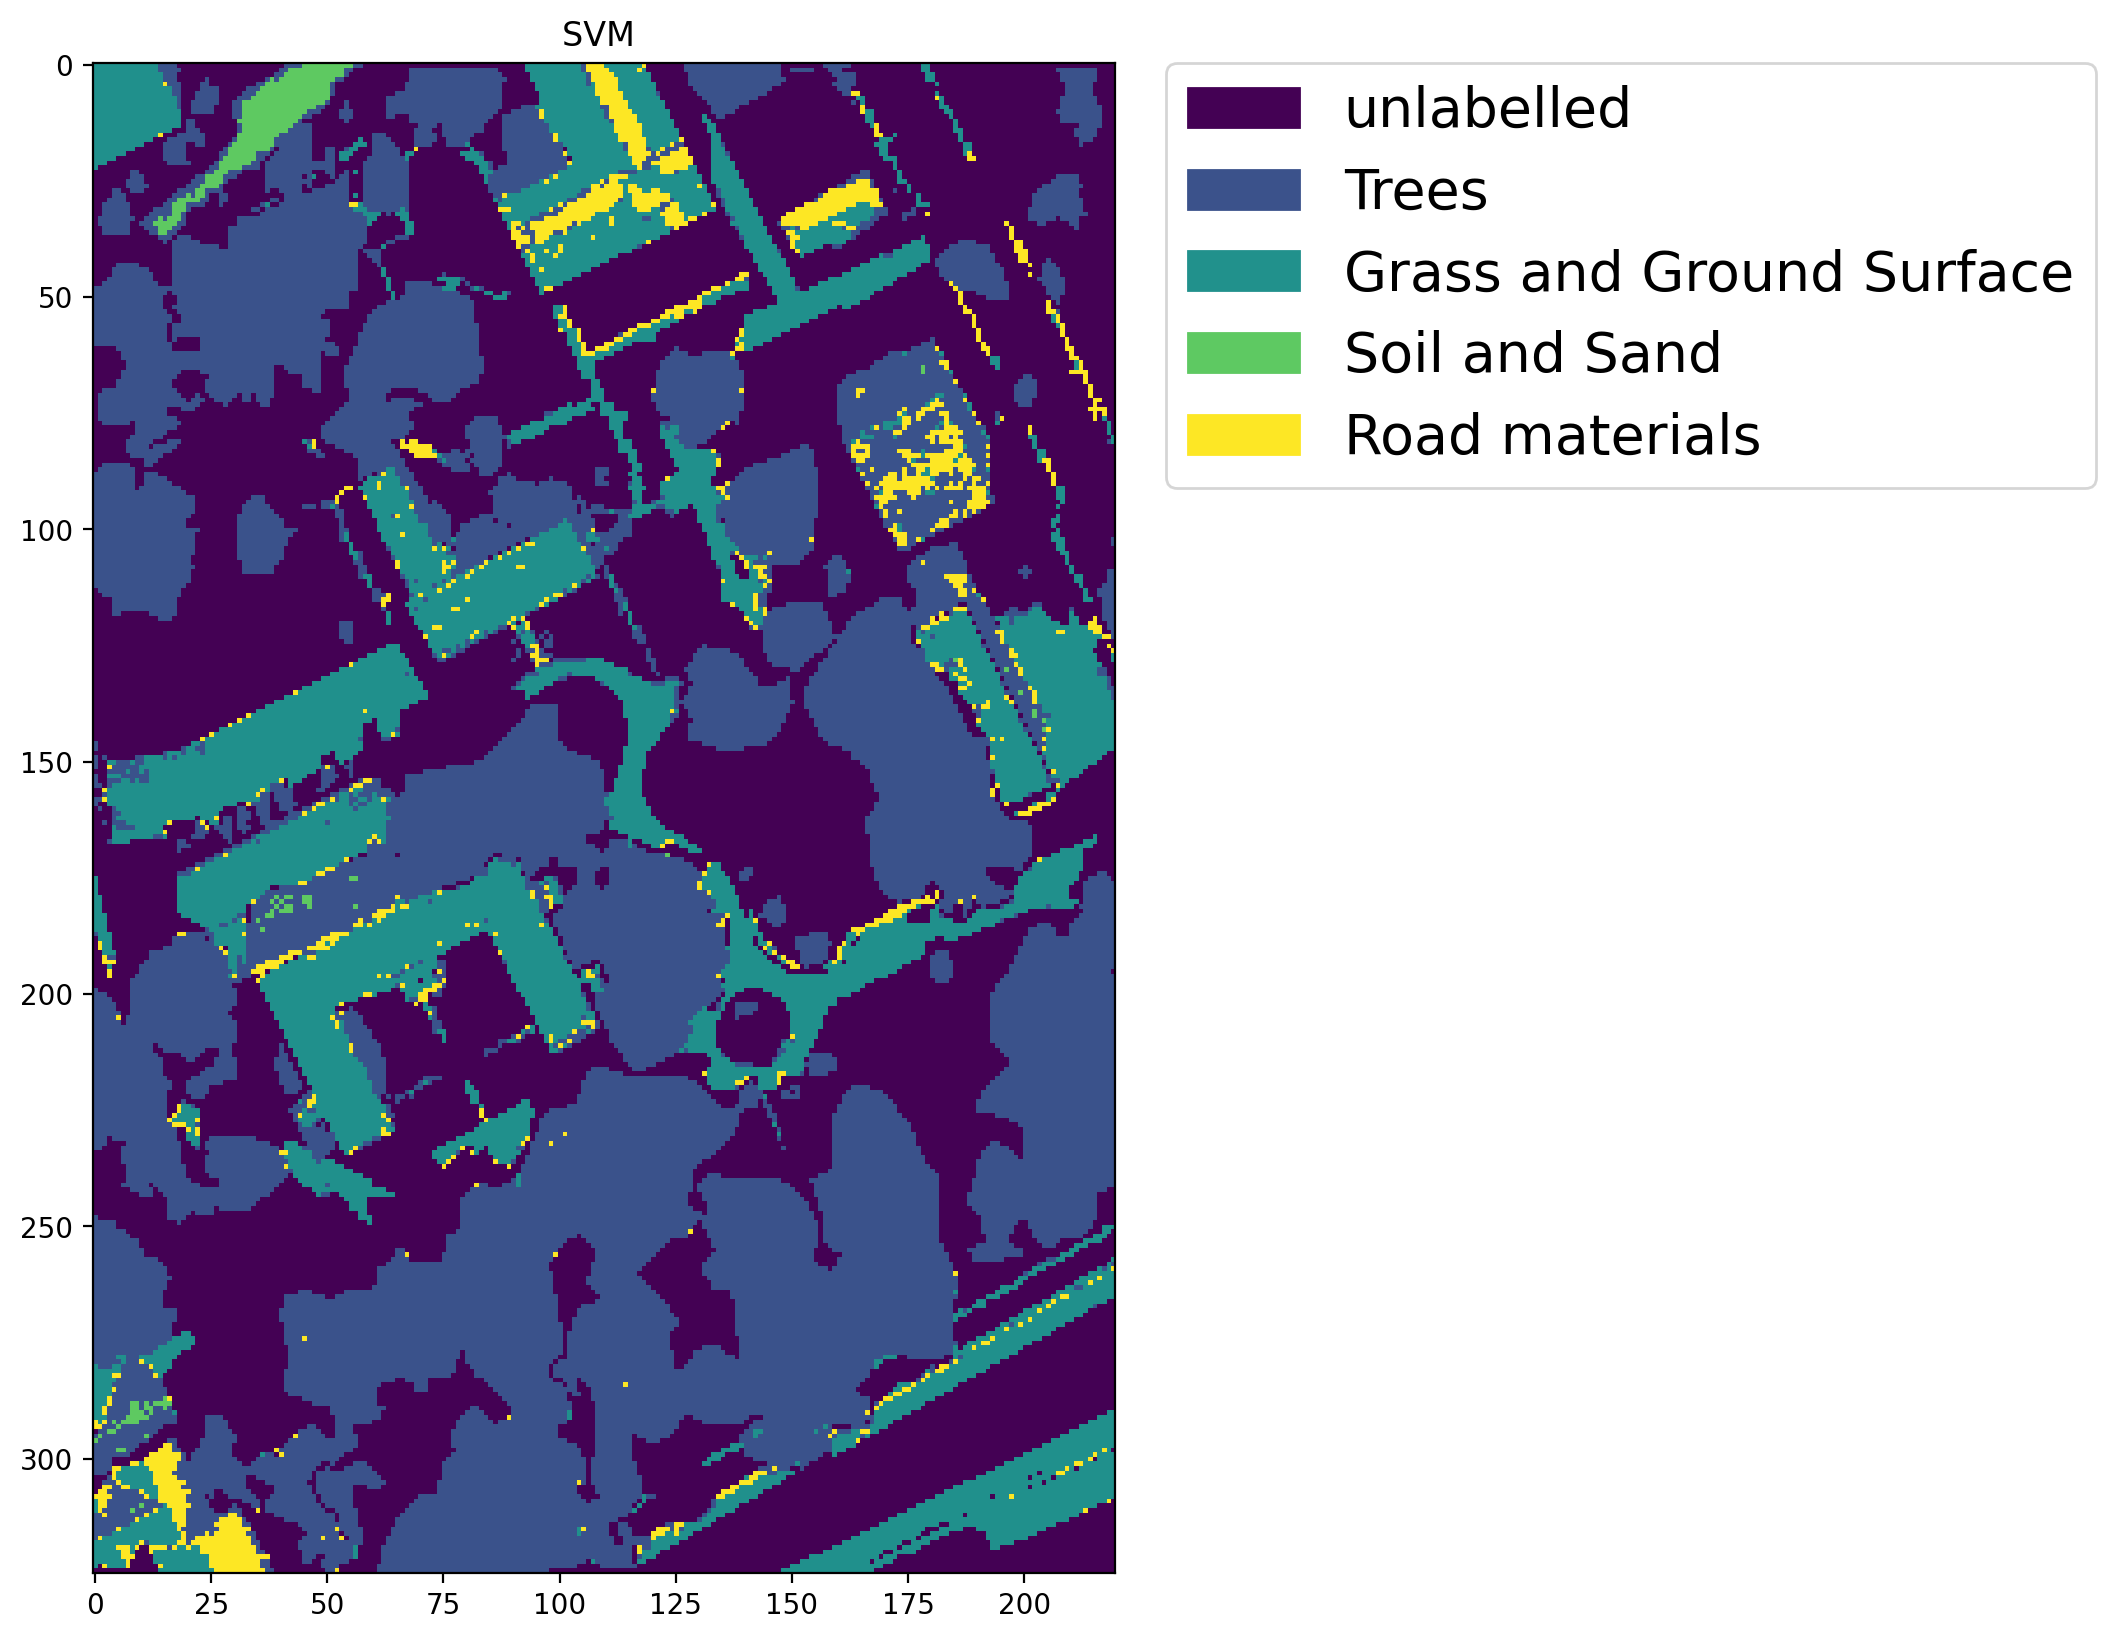

In [61]:
# Apply PCA object on the original X dataset

X_PCA= PCAObj.fit(X).transform(X)

# Use any svcmodel1 svcmodel2 or svcmodel3 for prediction

X_predict = svcmodel3.predict(X_PCA)

# set the classes that we dont include in our training to -1. For example, cloth panel, yellow curb, unalabeled etc.
X_predict[unwanted]=-1

r,c,_=hsi.shape

# Reshape the X to a 2d array

X_predict=X_predict.reshape((r,c))

# Create a dictionary for labels

dict={-1:'unlabelled',0: 'Trees', 1: 'Grass and Ground Surface', 2: 'Soil and Sand',3: 'Road materials',4: 'Water and Building shadows',5:'Buildings',6:'Sidewalks'}

# plot the X_predict

fig, ax = plt.subplots(1, figsize=[10,10], dpi= 200)
im = plt.imshow(X_predict)

# Get the colors of the values, according to the colormap used by imshow

values = np.unique(X_predict.ravel())
print(values)
colors = [ im.cmap(im.norm(value)) for value in values]

# print(colors)
# create a patch (proxy artist) for every color 

if dict == {} :
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=int(values[i])) ) for i in range(len(values)) ]
else :
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=dict[int(values[i])] ) ) for i in range(len(values)) ]

plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize= 20 )

plt.title("SVM ")

### Conclusion
The dimensionality of data before PCA is 65 and after PCA it is 3. PCA reduced the dimensionality of data by a factor of almost 21.
We can conclude from the above results that when we apply SVM to the original data, the accuracy is around 88.7% and after applying SVM to the PCA is 88.9%. So we are getting the nearly same accuracy in both cases.
That's why we apply classifiers on the reduced data. It reduces the time and space complexity. Depending on the problem, the accuracy with PCA might be even higher compared to using the original data.